In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
import missingno as msno

In [52]:
df=pd.read_csv("ShelterDogs.csv")
df.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,2019-12-10,2019-12-11,2019-12-11,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,2019-12-01,2019-12-01,2019-12-09,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,2019-12-08,2019-12-23,2019-12-08,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,2019-12-10,2019-12-11,2019-12-11,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df.shape

(2937, 19)

In [54]:
df.columns

Index(['ID', 'name', 'age', 'sex', 'breed', 'date_found', 'adoptable_from',
       'posted', 'color', 'coat', 'size', 'neutered', 'housebroken',
       'likes_people', 'likes_children', 'get_along_males',
       'get_along_females', 'get_along_cats', 'keep_in'],
      dtype='object')

In [55]:
df["color"].unique()

array(['red', 'black and white', 'saddle back', 'yellow-brown', 'black',
       'brown', 'gray and white', 'brown and white', 'tricolor', 'spotty',
       'white', 'apricot', 'black and brown', 'golden', 'striped',
       'yellow', 'wild boar', 'black and tan', 'gray and black', 'sable',
       'gray', 'red and white', 'dotted'], dtype=object)

In [56]:
df.dtypes

ID                     int64
name                  object
age                  float64
sex                   object
breed                 object
date_found            object
adoptable_from        object
posted                object
color                 object
coat                  object
size                  object
neutered              object
housebroken           object
likes_people          object
likes_children        object
get_along_males       object
get_along_females     object
get_along_cats        object
keep_in               object
dtype: object

In [57]:
df.isna().sum()

ID                      0
name                   92
age                     0
sex                     0
breed                   0
date_found              0
adoptable_from          0
posted                  0
color                   0
coat                    0
size                    0
neutered             1085
housebroken          2477
likes_people          938
likes_children       1718
get_along_males      1304
get_along_females    1264
get_along_cats       2506
keep_in              1021
dtype: int64

In [58]:
df.drop("get_along_cats", axis=1, inplace=True)
df.drop("housebroken", axis=1, inplace=True)


In [59]:
df.nunique()

ID                   1694
name                 2016
age                   233
sex                     2
breed                 277
date_found           1583
adoptable_from       1578
posted               1167
color                  23
coat                    4
size                    3
neutered                2
likes_people            2
likes_children          2
get_along_males         2
get_along_females       2
keep_in                 3
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
df.describe()

,ID,age
count,2937.000000,2937.000000
mean,1742.655431,8.569551
std,4023.313413,4.140216
min,1.000000,0.150000
25%,167.000000,5.830000
50%,556.000000,8.670000
75%,1451.000000,11.250000
max,23809.000000,21.920000


In [62]:
df["coat"].value_counts()

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [63]:
df["neutered"].value_counts()

yes    1151
no      701
Name: neutered, dtype: int64

C:\Users\ripog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


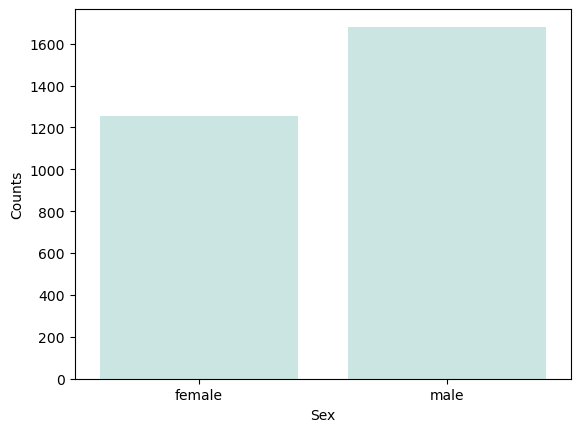

In [75]:
sns.countplot(df["sex"].values,color="#c7eae5")
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

In [76]:
df['date_found']=df['date_found'].astype('datetime64[ns]')
df['year_found']=df['date_found'].dt.year
df['month_found']=df['date_found'].dt.month
df['adoptable_from']=df['adoptable_from'].astype('datetime64[ns]')
df['year_adopted']=df['adoptable_from'].dt.year
df['month_adopted']=df['adoptable_from'].dt.month

<AxesSubplot:title={'center':'Foundation year'}, ylabel='Years'>

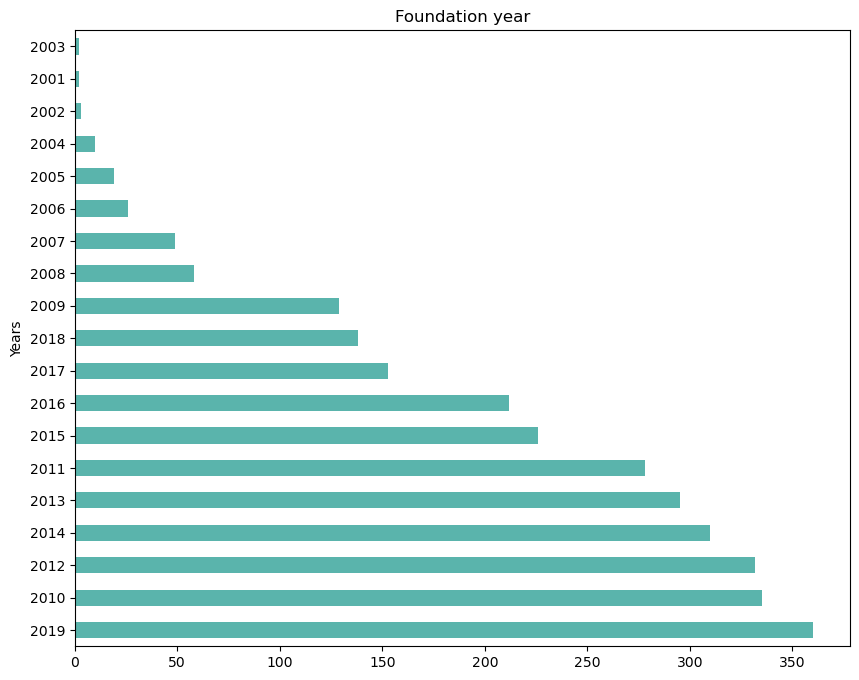

In [77]:
plt.subplots(figsize=(10,8))
plt.ylabel('Years')
plt.title("Foundation year")
df['year_found'].value_counts().plot(kind='barh',color="#5ab4ac")

<AxesSubplot:title={'center':'Foundation month'}, ylabel='Months'>

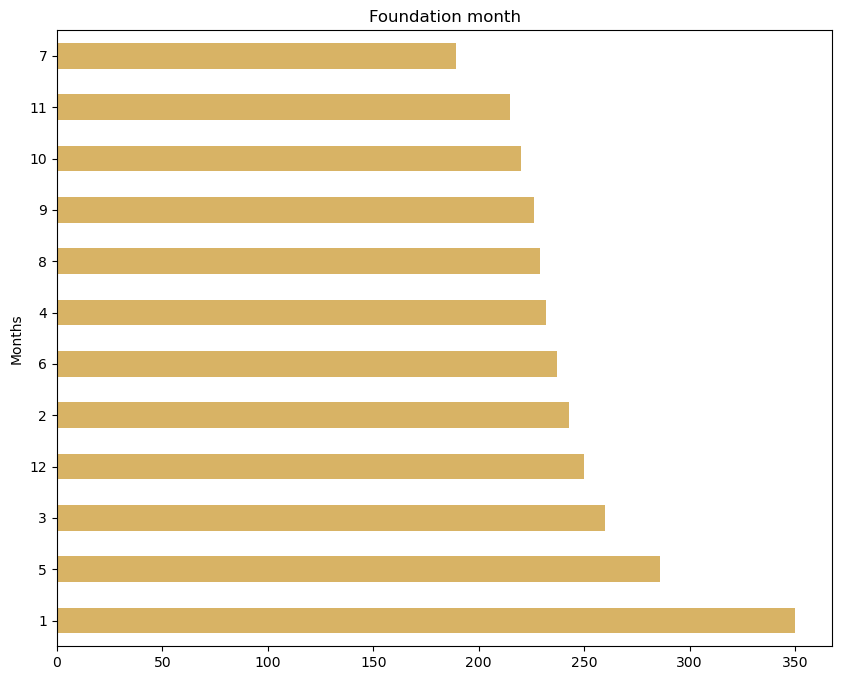

In [78]:
plt.subplots(figsize=(10,8))
plt.ylabel('Months')
plt.title("Foundation month")
df = df.sort_values(by = 'month_found', ascending=True)
df['month_found'].value_counts().plot(kind='barh',color="#d8b365")


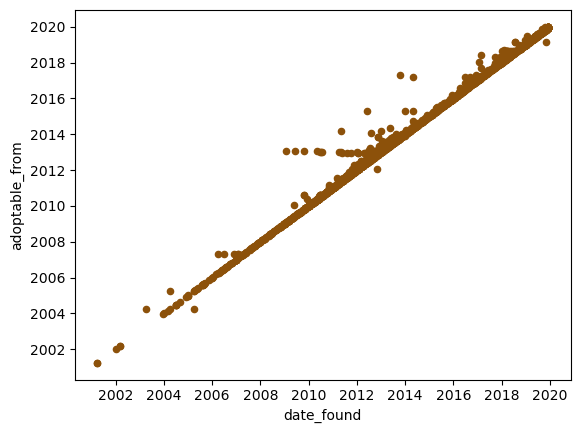

In [83]:
df.plot(kind='scatter', x='date_found', y='adoptable_from',color="#8c510a")
plt.show()

In [80]:
le = LabelEncoder()
df['get_along_females'] = le.fit_transform(df['get_along_females'].astype(str))
df['get_along_males'] = le.fit_transform(df['get_along_males'].astype(str))
df['likes_children'] = le.fit_transform(df['likes_children'].astype(str))
df['likes_people'] = le.fit_transform(df['likes_people'].astype(str))


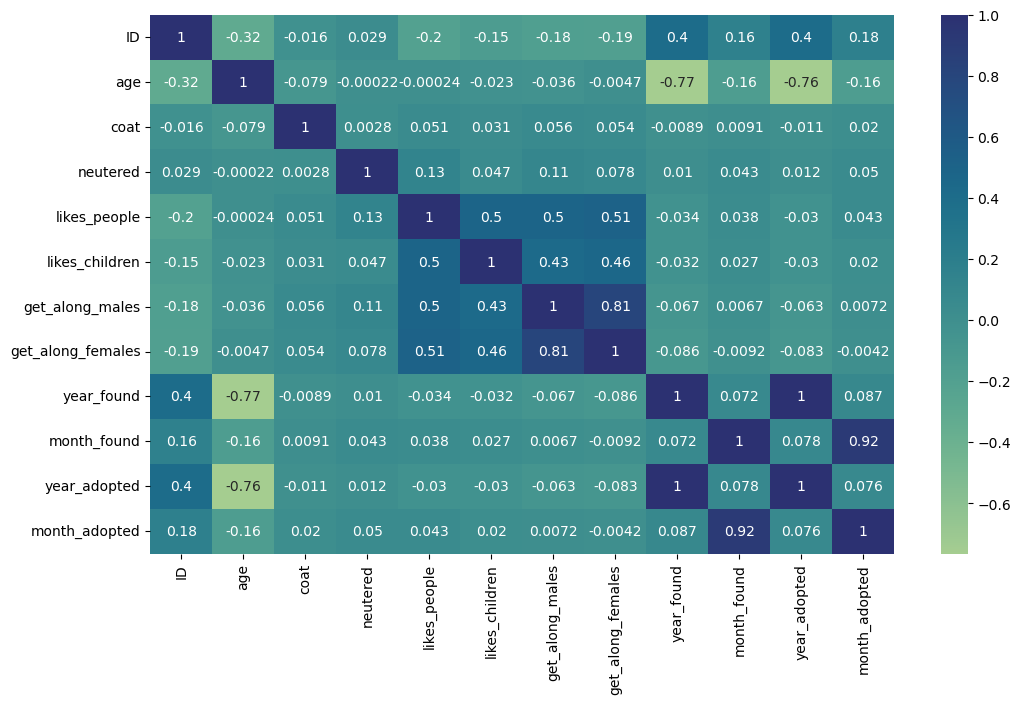

In [82]:
df['coat'] = le.fit_transform(df['coat'])
df['neutered'] = le.fit_transform(df['neutered'].astype(str))
corr_matrix = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()
